## **Customer Segmentation - Mall Customers data set**

Data: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

___________________________________________________________________________________________________________________________

#### **1. Data Exploration**
See customer_segmentation _eda.ipynb

___________________________________________________________________________________________________________________________

#### **2. Model Development**

<span style="color:#ed8315">Based on the shape of the data in the correlation plot between <u>Annual_Income and Spending_Score</u> (See EDA file) where we see distinct relatively seperate clusters, I am moving foreword with **k-Means for clustering**</span>

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import scipy.stats as stats
import researchpy as rp

**<u>Data Preperation</u>**

In [3]:
df = pd.read_csv('data/customers.csv')

# Drop ID Column
df = df.drop(['CustomerID'], axis = 1)

# Based on EDA - drop Gender column
df = df.drop(['Gender'], axis = 1)

In [4]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


**<u>Feature Engineering</u>**
* As the range for the continuous variables differs **scaling** is requiered
* **Robust-Scaler** was chosen as the data does not seem to be distributed normaly and in one variable there are outliers

In [5]:
# Scale continuous variables
scaler = RobustScaler()

for var in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    newvar_name = 'scaled_' + var
    scaler.fit(df[[var]])
    df[[newvar_name]] = scaler.transform(df[[var]])

In [6]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),scaled_Age,scaled_Annual Income (k$),scaled_Spending Score (1-100)
0,19,15,39,-0.839506,-1.273973,-0.287582
1,21,15,81,-0.740741,-1.273973,0.810458
2,20,16,6,-0.790123,-1.246575,-1.150327
3,23,16,77,-0.641975,-1.246575,0.705882
4,31,17,40,-0.246914,-1.219178,-0.261438


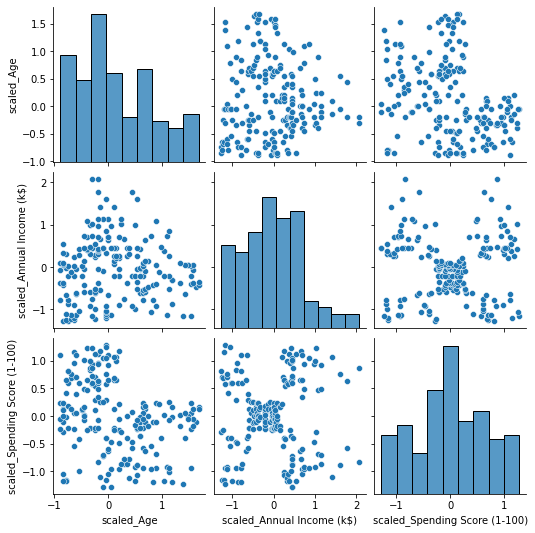

In [7]:
sns.pairplot(df.iloc[:,3:])

**<u>Clustering with K-Means</u>**

***1. Anual Income vs. Spending Score***

In [8]:
df_1 = df.iloc[:,4:]

In [9]:
def clustering_alg(data, k):
    k_list = list(range(2, k+1))
    inertia_list=[]
    silhouette_scores = []
    
    for k in k_list:
        model = KMeans(
            n_clusters = k,
            init='k-means++', 
            max_iter=500, 
            random_state=42)
        model.fit(data)
        labels = model.labels_
        inertia_list.append(model.inertia_)
        silhouette_scores.append(metrics.silhouette_score(data, labels))
    
    df_inertia = pd.DataFrame({'k_value': list(range(2, k+1)),
                               'inertia': inertia_list})
    df_silhouette = pd.DataFrame({'k_value': list(range(2, k+1)),
                                  'silhouette_score': silhouette_scores})

    return df_inertia, df_silhouette

In [10]:
df_inertia, df_silhouette = clustering_alg(df_1, 10)

Text(0, 0.5, 'Cluster sum of squared distances (inertia)')

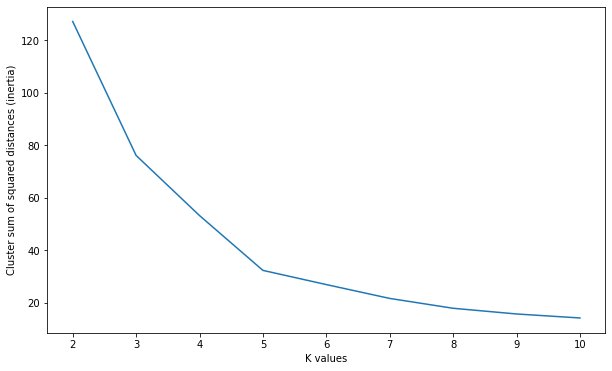

In [11]:
# visualization of k-means and inertia
plt.figure(figsize= (10, 6))
plt.plot(df_inertia['k_value'], df_inertia['inertia'])
plt.xlabel('K values')
plt.ylabel('Cluster sum of squared distances (inertia)')

Text(0, 0.5, 'silhouette_score')

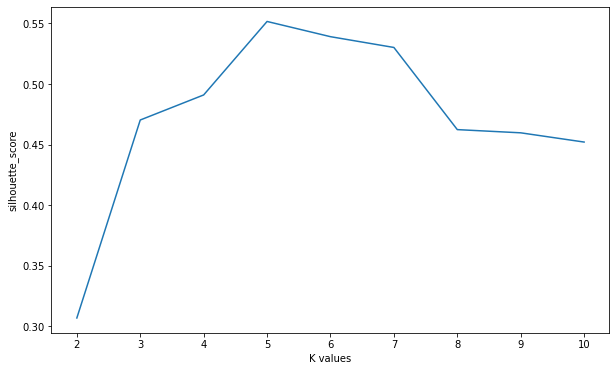

In [12]:
# visualization of k-means and silhouette_scores 
plt.figure(figsize= (10, 6))
plt.plot(df_silhouette['k_value'], df_silhouette['silhouette_score'])
plt.xlabel('K values')
plt.ylabel('silhouette_score')

<span style="color:#ed8315">>>> When **k=5** graph starts to platto and silouette peaks, which matches what was found in the EDA scatter plot</span>

In [13]:
# model with k = 5
model_5 = KMeans(
            n_clusters = 5,
            init='k-means++', 
            max_iter=500, 
            random_state=42)

model_5.fit(df_1)

centroids_5 = model_5.cluster_centers_
df_centroids = pd.DataFrame(centroids_5, columns=['X', 'Y'])
labels = model_5.labels_

In [14]:
df_1['label'] = labels

<AxesSubplot:xlabel='scaled_Annual Income (k$)', ylabel='scaled_Spending Score (1-100)'>

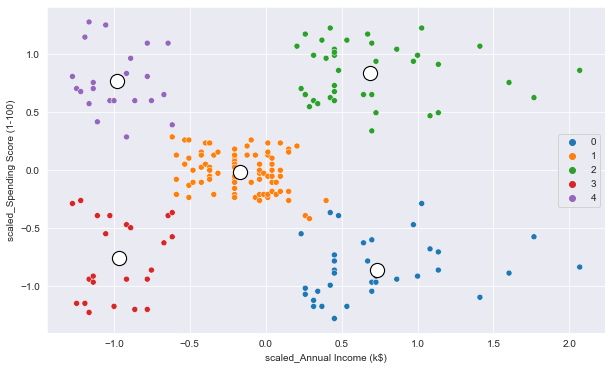

In [15]:
plt.figure(figsize= (10, 6))
sns.set_style("darkgrid")
sns.scatterplot(data=df_1, x='scaled_Annual Income (k$)', y='scaled_Spending Score (1-100)', hue='label', palette='tab10')
sns.scatterplot(data=df_centroids, x='X', y='Y', color='white', edgecolor='black', s=200)

**<span style="color:red">
To do: 1. Check for statestical significance between the new "groups" 2. Get exact "clustering ranges/borders" from data set
</span>**

***2. Age vs. Spending Score***

<U>Finding the Clusters:</U>

In [16]:
df_2 = df.iloc[:,3:]
df_2 = df_2.drop(['scaled_Annual Income (k$)'], axis = 1)

In [17]:
df2_inertia, df2_silhouette = clustering_alg(df_2, 10)

Text(0, 0.5, 'Cluster sum of squared distances (inertia)')

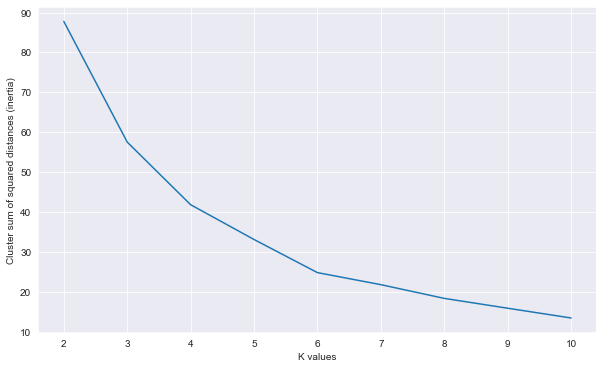

In [18]:
# visualization of k-means and inertia
plt.figure(figsize= (10, 6))
plt.plot(df2_inertia['k_value'], df2_inertia['inertia'])
plt.xlabel('K values')
plt.ylabel('Cluster sum of squared distances (inertia)')

Text(0, 0.5, 'silhouette_score')

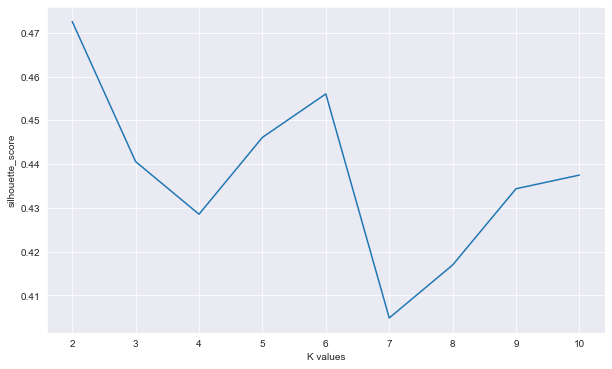

In [19]:
# visualization of k-means and silhouette_scores 
plt.figure(figsize= (10, 6))
plt.plot(df2_silhouette['k_value'], df2_silhouette['silhouette_score'])
plt.xlabel('K values')
plt.ylabel('silhouette_score')

<span style="color:#ed8315">>>> Here we can see that when **k=6** the interia graph starts to platto, however according the silouette graph peaks when **k=2**. Follows I will visualize both options</span>

In [20]:
# model with k = 2
model_2 = KMeans(
            n_clusters = 2,
            init='k-means++', 
            max_iter=500, 
            random_state=42)

model_2.fit(df_2)

centroids_2 = model_2.cluster_centers_
df2_centroids = pd.DataFrame(centroids_2, columns=['X', 'Y'])
labels2 = model_2.labels_

In [21]:
df_2['label'] = labels2

<AxesSubplot:xlabel='scaled_Age', ylabel='scaled_Spending Score (1-100)'>

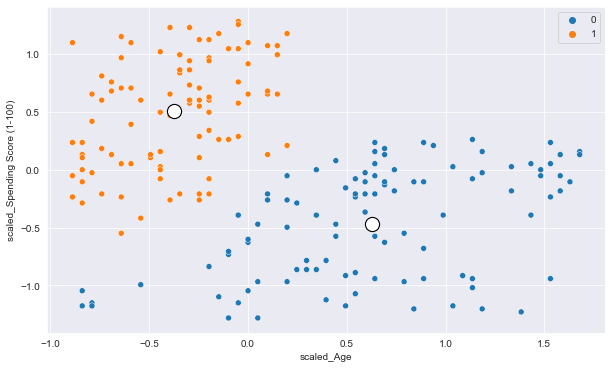

In [22]:
plt.figure(figsize= (10, 6))
sns.set_style("darkgrid")
sns.scatterplot(data=df_2, x='scaled_Age', y='scaled_Spending Score (1-100)', hue='label')
sns.scatterplot(data=df2_centroids, x='X', y='Y', color='white', edgecolor='black', s=200)

In [23]:
df_6 = df_2.drop(['label'], axis = 1)

In [24]:
# model with k = 6
model_6 = KMeans(
            n_clusters = 6,
            init='k-means++', 
            max_iter=500, 
            random_state=42)

model_6.fit(df_6)

centroids_6 = model_6.cluster_centers_
df6_centroids = pd.DataFrame(centroids_6, columns=['X', 'Y'])
labels6 = model_6.labels_

In [25]:
df_6['label'] = labels6

<AxesSubplot:xlabel='scaled_Age', ylabel='scaled_Spending Score (1-100)'>

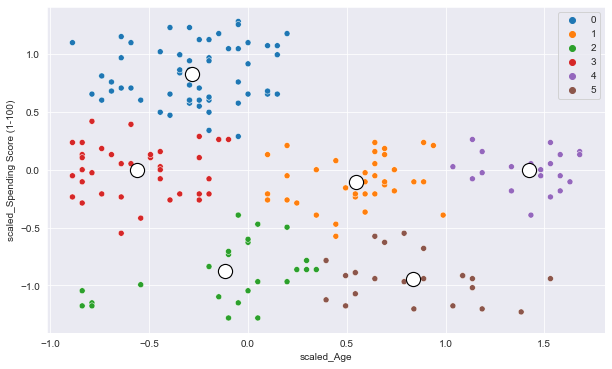

In [26]:
plt.figure(figsize= (10, 6))
sns.set_style("darkgrid")
sns.scatterplot(data=df_6, x='scaled_Age', y='scaled_Spending Score (1-100)', hue='label', palette='tab10')
sns.scatterplot(data=df6_centroids, x='X', y='Y', color='white', edgecolor='black', s=200)

<span style="color:#ed8315">>>> Out of the two visulaisations, **k=2** seems like a btter fit for the data</span>

<U> Checking Statistical Significance</u>

In [35]:
age_k2 = df
age_k2['label'] = labels2

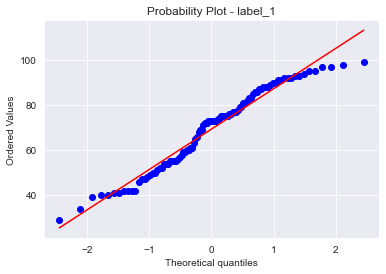

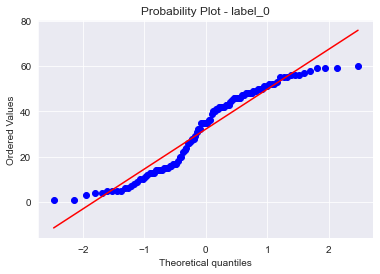

In [37]:
# Check if clusters are normaly distributed
unique_labels = age_k2['label'].unique()

for i in unique_labels:
    stats.probplot(age_k2[age_k2['label'] == i]['Spending Score (1-100)'], dist="norm", plot=plt)
    plt.title("Probability Plot - " + 'label_' + str(i))
    plt.show()

In [38]:
# t-test for comparison between groups
rp.ttest(group1= age_k2['Spending Score (1-100)'][df['label'] == 0], group1_name= "label_0",
         group2= age_k2['Spending Score (1-100)'][df['label'] == 1], group2_name= "label_1")

(   Variable      N       Mean         SD        SE  95% Conf.   Interval
 0   label_0  103.0  32.184466  17.954598  1.769119  28.675427  35.693505
 1   label_1   97.0  69.329897  17.939552  1.821486  65.714277  72.945517
 2  combined  200.0  50.200000  25.823522  1.825999  46.599210  53.800790,
                   Independent t-test   results
 0  Difference (label_0 - label_1) =   -37.1454
 1              Degrees of freedom =   198.0000
 2                               t =   -14.6284
 3           Two side test p value =     0.0000
 4          Difference < 0 p value =     0.0000
 5          Difference > 0 p value =     1.0000
 6                       Cohen's d =    -2.0697
 7                       Hedge's g =    -2.0618
 8                   Glass's delta =    -2.0689
 9                     Pearson's r =     0.7207)

<span style="color:#ed8315">>>> The two clusters are significantly  different in Spending_Score</span>

In [ ]:
# Define range of the two clusters (on Variable Age)
